In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

# 회귀분석
* 상관분석은 변수들이 얼마나 밀접한 관계를 가지고 있는지 분석하는 통계적 기법
* 한편, 회귀분석은 (상관분석 + 예측)하는 통계적 기법
* 수량형 값을 예측하는데 주로 사용되는 통계적 모형
  + 즉, 두 변수간의 선형(직선)관계를 식으로 표현하고
독립변수 $x$가 주어지면 종속변수$y$의 값이 얼마인지 추정
  + 독립변수와 종속변수 사이의 관계를 선형방정식으로 나타낸 것을 **회귀방정식**이라 함
    - $ \hat y = ax + b + \epsilon $
    - $a$ : 기울기
    - $b$ : 절편
    - $\epsilon$ : 오차, 잡음(noise)

* 회귀직선을 그릴때는 **`최소제곱법`** 이라는 수학적 기법을 이용하는데, 이는 **두 변수의 선형관계를 계량화** 한 것임 

$$ a = \frac{\sum(x_i - \bar x)(y_i - \bar y)}{\sum (x_i - \bar x)^2} $$
$$ b = \bar y - a\bar x$$

# 회귀분석으로 알수 있는 것
* 모형적합도 : 예측모델이 데이터에 얼마나 잘 맞는가?
  + 광고비와 매출액의 관계가 데이터에 잘 맞는지 검증할 수 있음
* 회귀계수 : 독립변수의 변화가 종속변수를 얼마나 변화시키는가?
  + 광고비가 증가하면 매출액은 얼마나 증가할지 예상할 수 있음

## 공부시간과 성적에 대한 상관/회귀 분석

In [1]:
time = [2,4,6,8]
score = [81,93,91,97]

In [6]:
df = pd.DataFrame({'time':time,'score':score})

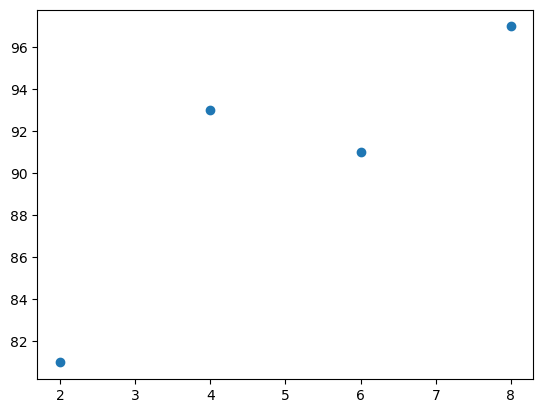

In [13]:
plt.scatter(time,score)
plt.show()

In [7]:
df.corr()

,time,score
time,1.00000,0.87244
score,0.87244,1.00000


### 최소제곱법을 이용한 회귀계수 계산

In [18]:
# 변수별 평균 계산
mtime = np.mean(time)
mscore = np.mean(score)

In [19]:
# 기울기 식 분자 : (x - x평균)(y - y평균)의 합
def top(x,mx, y, my):
    sum = 0
    for i in range(len(x)):
        sum = sum + (x[i]-mx)*(y[i]-my)
    return sum

In [22]:
# 기울기 식 분모 : (x - x평균)의 제곱합
def bottom(x, mx):
    sum = 0
    for i in range(len(x)):
        sum = sum + (x[i]-mx)**2
    return sum    

In [26]:
a = top(time,mtime,score,mscore)/bottom(time,mtime)
b = mscore - a*mtime
a,b

(2.3, 79.0)

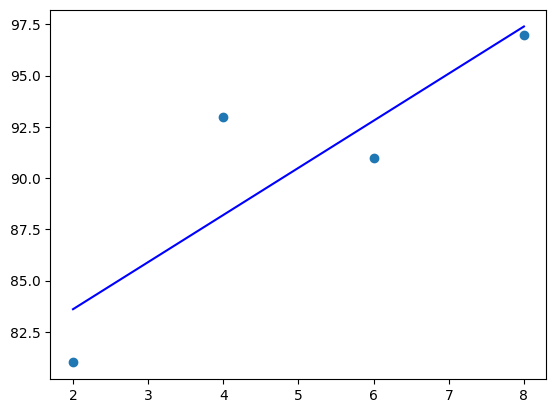

In [40]:
plt.scatter(time,score)

x = np.arange(np.min(time),np.max(time)+1, 1)
y = a*x + b     # 예측을 위한 직선방정식
plt.plot(x,y,'b')
plt.show()

### 판촉 전화횟수에 따라 판매량간의 회귀분석

In [41]:
p =  [96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84]
s = [41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30]

In [42]:
pmean = np.mean(p)
smean = np.mean(s)
pmax = np.max(p)
pmin = np.min(p)

In [48]:
a = top(p,pmean,s,smean)/bottom(p,pmean)
b = smean - a * pmean

In [51]:
a = np.sum((p - pmean)*(s-smean)) / np.sum((p-pmean) **2)
b = smean - a * pmean

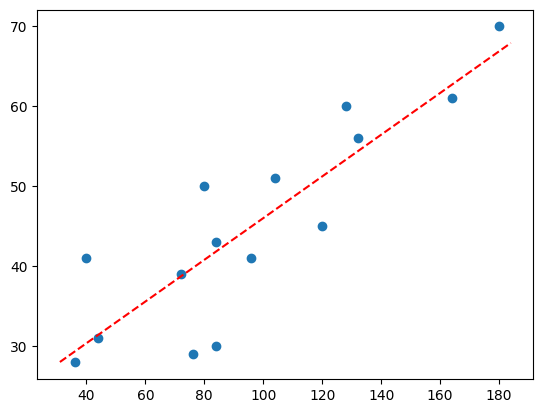

In [56]:
x = np.arange(pmin-5,pmax+5,1)
y = a*x + b

plt.scatter(p,s)
plt.plot(x,y,'r--')
plt.show()

# 회귀분석 좀더 자세히 이해하기
* statsmodels 패키지의 ols함수로 분석함
* 결정계수$R^2$ (0.75이상)

  + 전체 변동에 대해 모델이 설명하는 변동의 비를 의미함
  + 즉, 설정한 회귀직선에 **얼마나 값들이 밀집**되어 있는지 알수있음
  + 종속변수의 분산을 독립변수가 얼마나 **설명**하고 있는지 알수있음
  + $R^2$값이 작으면 회귀직선 주위의 점들이 많이 흩어져 있음을 의미

* 수정된 결정계수$R^2$ 

  + 수정된 결정계수는 기본적으로 결정계수와 같은 의미를 내포
  + 단, **독립변수의 갯수가 많아지면 결정계수 값이 커지는 경향**이 생김
  + 독립변수의 개수와 표본의 크기를 고려해서 결정계수를 보정함  

* $F$ 통계값 (0.05이하)

  + 회귀 모형에 대한 **통계적 유의미성 검증 결과** 의미
  + 자유도에 의해 조정된 변동과 그렇지 않는 변동의 비율을 나타낸 것
  + 즉, 이 관계가 선형으로 볼수 있는지 여부를 의미
  + **회귀계수가 유의미**한지를 판단

* 회귀계수 : 분석결과에서 intercept, coef 부분
* 회귀계수 유의성 여부 : 분석결과에서 P>|t| 부분 (0.05이하)

In [ ]:
!pip install statsmodels

In [58]:
from statsmodels.formula.api import ols

In [62]:
# 회귀모델 분석은 데이터프레임을 대상으로 실시
time = [2,4,6,8]
score = [81,93,91,97]

sungjuk = pd.DataFrame({'time':time,'score':score})

# 분석 대상컬럼은 '종속변수 ~ 독립변수' 형태의 식으로 작성해야 함
model = ols('score~time',data=sungjuk).fit()

# 분석결과 확인은 summary
print(model.summary())

# R-squared : 결정계수
# Adj. R-squared : 수정된 결정계수 => 다중회귀
# Prob (F-statistic) : F 통계값(선형관계 여부)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     6.373
Date:                Fri, 11 Nov 2022   Prob (F-statistic):              0.128
Time:                        13:09:05   Log-Likelihood:                -9.9083
No. Observations:                   4   AIC:                             23.82
Df Residuals:                       2   BIC:                             22.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0000      4.990     15.832      0.0

C:\Users\LG PC\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### 판촉 전화횟수에 따라 판매량간의 회귀모델 분석

In [ ]:
p =  [96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84]
s = [41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30]

In [64]:
sungjuk = pd.DataFrame({'p':p,'s':s})

# 분석 대상컬럼은 '종속변수 ~ 독립변수' 형태의 식으로 작성해야 함
model = ols('s~p',data=sungjuk).fit()

# 분석결과 확인은 summary
print(model.summary())

##

                            OLS Regression Results                            
Dep. Variable:                      s   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     38.50
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.19e-05
Time:                        14:33:35   Log-Likelihood:                -48.788
No. Observations:                  15   AIC:                             101.6
Df Residuals:                      13   BIC:                             103.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9800      4.390      4.552      0.0

C:\Users\LG PC\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [65]:
# 결정계수 𝑅2  (0.75이상)
# 𝐹  통계값 (0.05이하)
# P>|t| 부분 (0.05이하)

# 선형방정식을 이용한 예측
* 전화횟수 대비 판매량에 대한 회귀식 : $\hat{y} = 19.98 + 0.261x$

  + 전화횟수 96회와 104회에 대한 제품판매수 : 41, 51
  + 전화횟수 100회에 대한 예상 제품판매수 : 45
  + 그런데, 전화횟수 40회에 대한 예상 제품판매수 : 30 (실제:41)
  + 또한, 전화횟수 84회에 대한 예상 제품판매수 : 41 (실제:30,56)

* 정확한 예측이란? - 정확한 결과를 도출하는 것
  + 경제학과 경영학을 포함한 모든 분야에서는 불가능한 것으로 알려져 있음

* 추정에 있어 추정치 x에 근거해서 얼마나 정확하게/부정확하게 예측했나등의 척도가 필요 -> 추정치의 표준오차

  + 추정치의 표준오차 작다 - 추정치가 잘 맞음
  + 추정치의 표준오차 크다 - 추정치가 잘 안 맞음

### 총지불금액별 팁에 대한 회귀모델 분석

In [91]:
tips = sns.load_dataset('tips')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [92]:
df = pd.DataFrame(tips)

In [93]:
model = ols('tip~total_bill',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           6.69e-34
Time:                        14:46:34   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

### 다이아몬드 캐럿당 가격에 대한 회귀모델 분석

In [85]:
diamonds = sns.load_dataset('diamonds')
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [86]:
df = pd.DataFrame(diamonds)

In [88]:
model = ols('price~carat', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:44:51   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.0